## Data preparation and sanitization

,prop,other_resp,other_prop,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,50,50,50,43000,26,60,31000,20,4.2,3.0,2.8,50
1,50,20,20,12000,7,20,38000,20,1.9,4.4,2.9,50
2,120,50,80,88000,50,20,69000,12,3.3,3.8,3.4,80
3,50,50,50,24000,50,60,26000,14,3.6,3.8,2.6,50
4,100,50,50,137000,24,60,43000,4,3.6,2.5,2.7,100


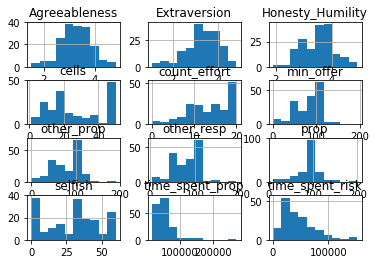

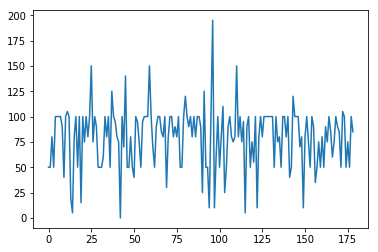

In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

# Read and sanitize the data
df = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")
df = df.dropna()

#print(df[50:])

# Show head and histograms
display(df.head())
df.hist()

# Plot sample figure for min_offers
plt.figure()

x = range(0, len(df['prop']))
x1 = df['min_offer']

plt.plot(x, x1)

## Individual plots

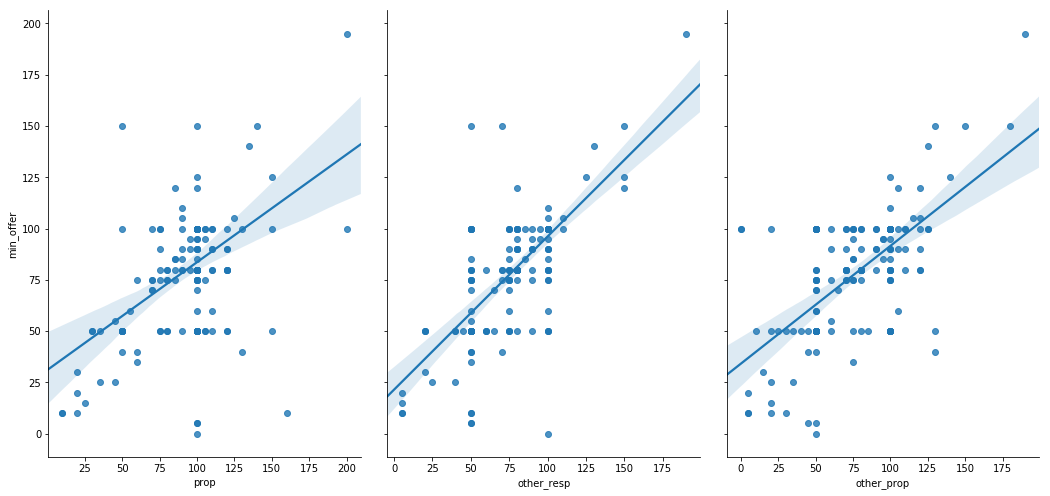

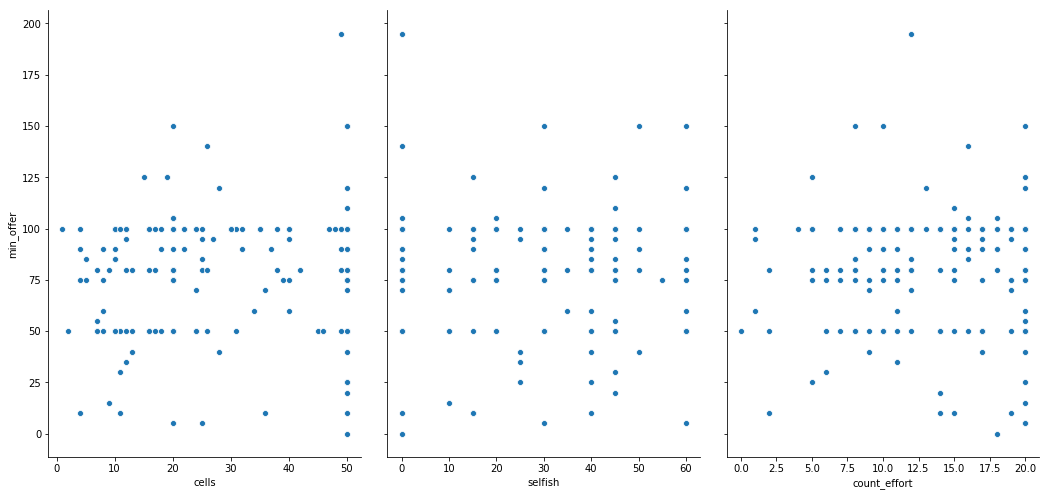

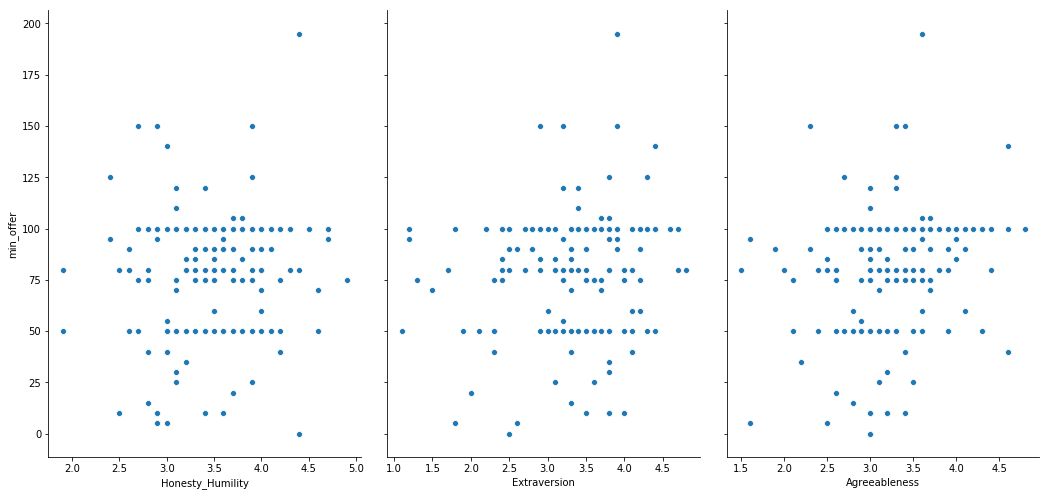

In [29]:
sb.pairplot(df, x_vars=('prop','other_resp','other_prop'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')
sb.pairplot(df, x_vars=('cells', 'selfish','count_effort'), y_vars='min_offer', height=7, aspect=0.7)
sb.pairplot(df, x_vars=('Honesty_Humility', 'Extraversion','Agreeableness'), y_vars='min_offer', height=7, aspect=0.7)

## Mean and standard deviation

In [30]:
min_offers = df.iloc[:, -1:].values
mean = np.mean(min_offers)
std = np.std(min_offers)

print("Mean:", mean)
print("Sigma:", std)

Mean: 79.80446927374301
Sigma: 29.570307886750392


## Linear regression (continuous dataset)

In [31]:
def gain(predicted, min_offer):
    return 0 if predicted < min_offer else predicted

def loss(predicted, min_offer):
    return min_offer if predicted < min_offer else predicted - min_offer


Intercept: [12.14795034]
Coef: [[-2.00585445e-02  4.83360086e-01  3.84727117e-01  9.83711395e-05
   1.26315032e-01 -3.59930595e-02 -1.64681964e-04 -3.20690818e-01
  -3.59917342e+00  2.18793249e+00  2.95923847e+00]]
R2: 0.4771808621980129
        y_pred  y_test
0   104.758896     100
1   102.059325     100
2    52.520034     100
3    64.208075     100
4    55.966847      80
5    81.786097      90
6   102.444911     100
7    91.481684     120
8    54.815745      50
9    72.518458      80
10   83.013446     100
11   65.050118      75
12  103.190294      80
13   77.085411     100
14   96.391590     100
15   69.377777      50
16   54.632294     100
17   16.485387      10
18  112.715923     125
19   53.001047      10
20   82.389194      75
21   91.688370     100
22   87.985569      90
23   60.033943     100
24   72.608936      90
25  103.490745     100
26  100.027135     100
27   58.016824      85
28   95.801134     100
29   64.637533      70
30   51.435992      70
31   52.158158      75
32 

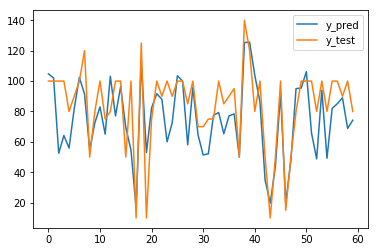

In [32]:
from sklearn.linear_model import LinearRegression

#df = df.drop('count_effort', 1)
#df = df.drop('selfish', 1)
#df = df.drop('cells', 1)

#print(df)

# Split into inputs and oututs
x = df.iloc[:, :-1].values

y = df.iloc[:, -1:].values
#print(x)
#print(y)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)
#print(xTrain)
#print(yTrain)

regressor = LinearRegression(copy_X=True).fit(xTrain, yTrain)

print("Intercept:", regressor.intercept_)
print("Coef:", regressor.coef_)

yPredict = regressor.predict(xTest)
print("R2:", r2_score(yTest, yPredict))

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
print(out_data)

out_data.plot()

## Determine significant features

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import RFE

NUM_FEATURES = 4

test = SelectKBest(score_func=f_regression, k=NUM_FEATURES)
fit = test.fit(xTrain, yTrain)
print(fit.scores_)

# Retrieve the feature index and the corresponding names
max_indices = fit.scores_.argsort()[-NUM_FEATURES:][::-1]
print(max_indices)
max_features = [df.columns.values[index] for index in max_indices]
print(max_features)

[2.57690035e+01 9.44783670e+01 7.90854633e+01 8.88924604e+00
 3.65064521e-01 1.74086982e+00 2.10919178e-03 3.34212911e-01
 1.92695223e+00 2.61298426e+00 4.09875329e+00]
[1 2 0 3]
['other_resp', 'other_prop', 'prop', 'time_spent_risk']


/home/franck/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
rfe = RFE(regressor, NUM_FEATURES)
fit = rfe.fit(xTrain, yTrain)
print("Features", fit.n_features_)
print("Selected features", fit.support_)
print("Feature ranking", fit.ranking_)

max_indices = [i for i, b in enumerate(fit.support_) if b]
print(max_indices)

max_features = [df.columns.values[index] for index in max_indices]
print(max_features)

Features 4
Selected features [False  True False False False False False False  True  True  True]
Feature ranking [5 1 2 8 3 6 7 4 1 1 1]
[1, 8, 9, 10]
['other_resp', 'Honesty_Humility', 'Extraversion', 'Agreeableness']


/home/franck/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Bayesian ridge model (continuous)

   other_resp  Honesty_Humility  Extraversion  Agreeableness
0          50               4.2           3.0            2.8
1          20               1.9           4.4            2.9
2          50               3.3           3.8            3.4
3          50               3.6           3.8            2.6
4          50               3.6           2.5            2.7
[75.          3.20000005  3.29999995]
[50]
R2: 0.5852894222069152
        y_pred  y_test
0    93.971384     100
1    93.587122     100
2    93.663049     100
3    56.598902     100
4    56.263119      80
5    86.175266      90
6    93.898278     100
7    78.656957     120
8    56.403693      50
9    74.708362      80
10   93.584043     100
11   70.607139      75
12   78.919375      80
13   93.455525     100
14   93.608154     100
15   56.495270      50
16   56.119468     100
17   23.019567      10
18  112.365069     125
19   56.556321      10
20   78.818821      75
21   93.306233     100
22   78.516383      90
23   56.092279  

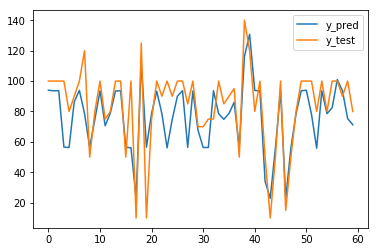

In [35]:
from sklearn.linear_model import BayesianRidge

# Use features from above
new_df = df[max_features]
print(new_df.head())

# Split dataset
x = new_df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

print(xTrain[0])
print(yTrain[0])

regressor = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
      lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
      normalize=False, tol=0.001, verbose=False).fit(xTrain, np.ravel(yTrain))
yPredict = regressor.predict(xTest)
print("R2:", r2_score(yTest, yPredict))

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
print(out_data)

out_data.plot()

## Polynomial linear regression (continuous)

R2: 0.47817043742328835
        y_pred  y_test
0    91.949754     100
1    97.345615     100
2    93.322906     100
3    63.429392     100
4    57.489908      80
5    85.986321      90
6    92.568402     100
7    78.703270     120
8    58.949817      50
9    69.368101      80
10   96.836019     100
11   47.385948      75
12   78.974160      80
13   91.056433     100
14   93.096990     100
15   59.994686      50
16   54.534865     100
17   34.627862      10
18  123.022604     125
19   60.383769      10
20   79.810656      75
21   93.624260     100
22   75.037887      90
23   51.261433     100
24   69.901161      90
25   89.947309     100
26   93.524189     100
27   57.732130      85
28   93.336760     100
29   68.580184      70
30   59.123308      70
31   57.459862      75
32   93.197571      75
33   77.212544     100
34   72.406442      85
35   77.998503      90
36   83.719212      95
37   56.600462      50
38  120.005955     140
39  144.664866     120
40   93.765701      80
41   94.62

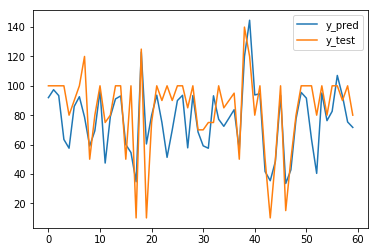

In [36]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(xTrain)

regressor = LinearRegression(copy_X=True).fit(x_poly, yTrain)
yPredict = regressor.predict(polynomial_features.fit_transform(xTest))
print("R2:", r2_score(yTest, yPredict))

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
print(out_data)

out_data.plot()

## Applying logistic regression to the categorial dataset

Intercept: [  9.03688639   2.91749603  -0.52790853  -1.87066612  -4.6228321
  -0.39048541   2.95246763   7.09438772  -1.93451605  -4.61053729
   5.86425722   3.90531597   0.03575936   4.91575276  -5.71435264
  -5.82826318  -9.19683504   4.26340409   1.93153287  -3.63698933
   2.43884724 -10.68742592   3.66470435]
Coef: [[-1.79537635e-01 -1.55717053e-01 -1.22412886e-01 ... -2.27927246e-02
   7.93655424e-02 -3.27296684e-02]
 [ 1.26214834e-01  8.60228176e-02  3.65360383e-01 ... -2.07270790e-02
   4.94189740e-01 -1.78983052e-01]
 [-5.47248996e-02  2.23418833e-02 -6.40430016e-02 ... -4.33821748e-02
   6.37509831e-02 -3.01186890e-02]
 ...
 [-8.11244493e-02  4.54412207e-02  1.02063479e-01 ... -1.05591550e-04
   7.89770773e-02 -2.14206650e-02]
 [ 3.70538803e-02 -2.36794414e-01  8.60678210e-03 ...  2.71197837e-02
  -3.27296171e-02 -3.40810040e-02]
 [-5.77210599e-02 -8.33704105e-02 -3.09184648e-01 ...  2.04927078e-01
   4.10441054e-02  3.57281405e-01]]
R2: -0.8835942918701944
    y_pred  y_test


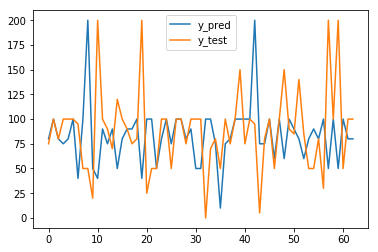

In [37]:
from sklearn.linear_model import LogisticRegression

df = pd.read_excel("UG_HH_NEW_categorical.xls")
df = df.dropna()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

regressor = LogisticRegression(solver='newton-cg', multi_class='multinomial').fit(xTrain, np.ravel(yTrain))

print("Intercept:", regressor.intercept_)
print("Coef:", regressor.coef_)

yPredict = regressor.predict(xTest)
print("R2:", r2_score(yTest, yPredict))

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
print(out_data)
out_data.plot()

## Testing clustering

[[2. 4. 3. ... 0. 0. 1.]
 [5. 5. 5. ... 0. 1. 0.]
 [3. 4. 4. ... 0. 1. 0.]
 ...
 [4. 4. 4. ... 0. 0. 0.]
 [3. 3. 1. ... 0. 1. 0.]
 [3. 2. 4. ... 1. 0. 0.]]
labels:  125 [1 7 5 5 2 0 0 6 5 1 1 0 2 2 2 5 2 2 1 0 4 6 0 1 0 7 0 2 0 7 0 6 0 0 1 0 2
 5 0 1 7 7 0 7 1 6 7 6 5 1 1 4 4 1 6 1 0 2 2 1 1 7 7 2 2 0 7 7 7 7 6 2 6 6
 7 0 0 2 2 4 3 2 3 3 6 2 3 4 2 7 7 0 2 1 4 7 7 2 0 0 0 2 6 0 0 0 0 2 0 6 1
 2 1 6 4 4 2 2 5 6 7 7 1 6 0]


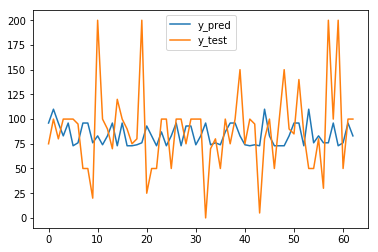

In [38]:
from sklearn.cluster import KMeans
#from functools import reduce
x = df.iloc[:1]
#display(x)

print(xTrain)
n_clusters = 8

kmeans = KMeans(random_state=0, n_clusters=8).fit(xTrain)
print("labels: ", len(kmeans.labels_), kmeans.labels_)
#xTrainClasses = kmeans.predict(xTrain)

#reduce cluster's target value
#reduce using mean
buckets = [[] for _ in range(n_clusters)]
for idx, y in enumerate(kmeans.labels_):
    buckets[y].append(yTrain[idx][0])

    
yTrainCluster = np.array([0] * n_clusters)
for idx in range(len(yTrainCluster)):
    if buckets[idx]:
        yTrainCluster[idx] = np.mean(buckets[idx])

yPredict = yTrainCluster[kmeans.predict(xTest)]
yPredict = np.array(yPredict)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
out_data.plot()